<a href="https://colab.research.google.com/github/rreschke/IMT-IA/blob/master/Exerc%C3%ADcio_Buscas_Heur%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício com Buscas heurísticas**

Suponha um problema que pode ser representado como um espaço de 9 estados (designados pelas letras A até K). Considere o seguinte grafo, que representa os sucessores possíveis para cada estado.

Os nodos representam os estados e as arestas o custo para passar de um estado a outro estado. A direção da flecha indica o estado resultante. Por exemplo, é possível atingir o estado A a partir do estado G com um custo de 10. 
Suponha agora que G é o estado inicial e K o estado final. Mostre a árvore de busca e a sequência dos nodos visitados (ordem de visita) em cada uma das seguintes buscas:

a) Busca em largura (cega).

b) Busca em profundidade (cega).

c) Busca com Custo Uniforme (cega).

d) Busca Gananciosa (heurística).

e) Busca A* (heurística).

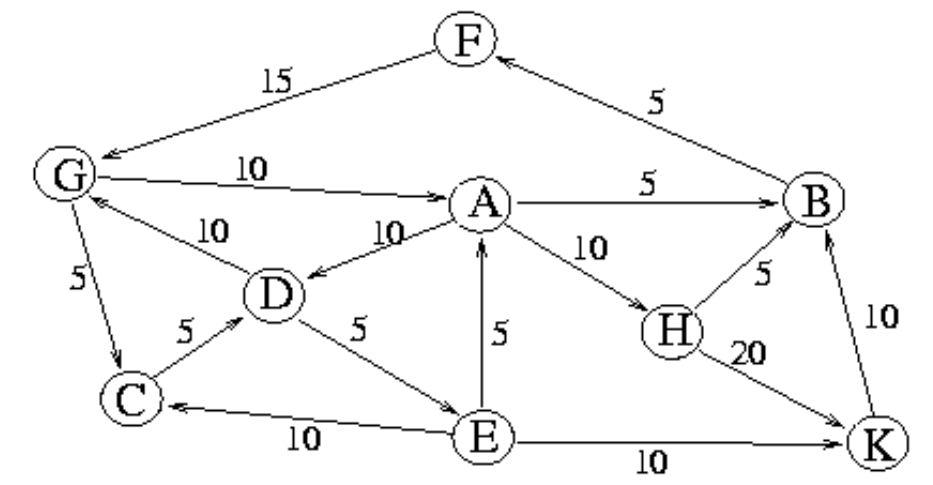

In [ ]:
mapa = {}
mapa['A'] = [('B', 5), ('D', 10), ('H', 10)]
mapa['B'] = [('F', 5)]
mapa['C'] = [('D', 5)]
mapa['D'] = [('E', 5), ('G', 10)]
mapa['E'] = [('A', 5), ('C', 10), ('K', 10)]
mapa['F'] = [('G', 15)]
mapa['G'] = [('A', 10), ('C', 5)]
mapa['H'] = [('B', 5), ('K', 20)]
mapa['K'] = [('B', 10)]

In [ ]:
# Considerando-se o destino K
h = {}
h['A'] = 28
h['B'] = 10
h['C'] = 19
h['D'] = 14
h['E'] = 10
h['F'] = 13
h['G'] = 23
h['H'] = 20
h['K'] = 0

In [ ]:
class No:
  def __init__(self, estado, pai, nivel, acaoGeradora):  
    self.estado = estado
    self.pai = pai
    self.nivel = nivel
    self.acaoGeradora = acaoGeradora

  def __ciclo(self):
    aux = self.pai
    while aux != None:
      if aux.estado == self.estado:
        return True
      else: aux = aux.pai
    return False

  def gereSucessores(self, detectaCiclo = True):
    sucessores=[]
    for e in mapa[self.estado]:
      novoNo = No(e, self, self.nivel+1, None)
      if detectaCiclo:
        if not novoNo.__ciclo():
          sucessores.append(novoNo)
      else:
        sucessores.append(novoNo)
    return sucessores

  def label(self):
    return str(self.estado)

**Busca em Largura**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaLargura(estadoInicial, estadoObjetivo):
  global dot

  fila = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(fila) > 0:
    no = fila.pop(0)  # retiro o primeiro da fila
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      #print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      fila.extend(sucessores)  # coloco os sucessores no fim da fila

def caminho(no):
  resp = []
  while no != None:
    resp.append(no.label())
    no = no.pai  # suba na árvore em direção ao no inicial
  resp.reverse()  # quero o caminho do início para o fim
  return resp

In [ ]:
estadoInicial = 'G'
estadoObjetivo = 'K'
buscaLargura(estadoInicial, estadoObjetivo)

Achei a solução!!
Caminho com 3 passos


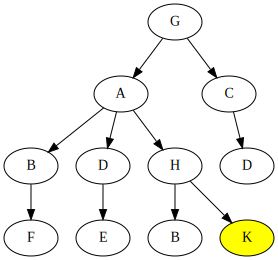

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaLargura')  # gera um arquivo .pdf com a imagem da árvore que pode ser baixado

'arvoreBuscaLargura.pdf'

**Busca em profundidade**

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

def buscaProfundidade(estadoInicial, estadoObjetivo):
  global dot

  pilha = [ No(estado=estadoInicial, pai=None, nivel=0, acaoGeradora=None) ]

  while len(pilha) > 0:
    no = pilha.pop()  # retiro o último da lista, ou seja, o primeiro da pilha
    if(no.pai != None):
      dot.node(str(no.pai), no.pai.label())
      dot.node(str(no), no.label())
      dot.edge(str(no.pai), str(no), no.acaoGeradora)
      #print('De:\n', no.pai.label(), '\nPara:\n', no.label(), '  -> Ação: ', no.acaoGeradora, '\n', sep='')
    if no.estado == estadoObjetivo:  # teste de objetivo
      print('Achei a solução!!')
      dot.node(str(no), no.label(), style='filled',fillcolor='yellow')
      print('Caminho com', len(caminho(no))-1, 'passos')
      break
    else:
      sucessores = no.gereSucessores(detectaCiclo=True)
      pilha = sucessores + pilha  # coloco os sucessores no topo da pilha


In [ ]:
buscaProfundidade(estadoInicial, estadoObjetivo)

Achei a solução!!
Caminho com 3 passos


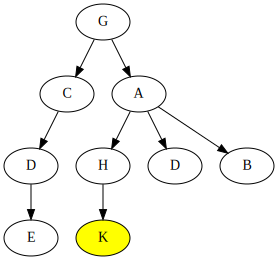

In [ ]:
dot

In [ ]:
dot.render('arvoreBuscaProfundidade')  # gera um arquivo .pdf com os passos imagem da árvore que pode ser baixado

'arvoreBuscaProfundidade.pdf'